# Monte Carlo Simulation (JP Morgan Chase)

**What is a Monte Carlo Simulation?**
<br>

A Monte Carlo simulation is a statistical method that uses repeated random sampling to estimate a mathematical result. In the context of finance, it's often used to model the probability distribution of possible outcomes for a given scenario.

#### Import Libraries

In [1]:
# Importing the necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Step 1: Download and Preprocess Data

In [2]:
# Step 1: Download and preprocess data
ticker = "JPM"  # JPMorgan Chase & Co.
data = yf.download(ticker, start="2020-01-01", end="2024-01-01")
data = data['Close']  # Use only the 'Close' price
data = data.resample('D').mean()  # Resample to daily frequency
data.fillna(method='ffill', inplace=True)  # Forward fill any missing data

[*********************100%***********************]  1 of 1 completed
<ipython-input-2-f70b1fcb2b80>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill any missing data


#### Step 2: Calculate Daily Returns

In [3]:
# Step 2: Calculate daily returns
daily_returns = data.pct_change().dropna()  # Calculate daily returns and remove NA values
mean_return = daily_returns.mean()  # Mean of the returns
std_return = daily_returns.std()  # Standard deviation of the returns

#### Step 3: Monte Carlo Simulation (e.g. Running 1000 simulations in 1 year)

In [4]:
# Step 3: Monte Carlo Simulation
num_simulations = 1000  # Number of simulation runs
num_days = 365  # Number of days to simulate (1 year)

# Empty array to hold the simulation results
simulation_results = np.zeros((num_days, num_simulations))

# Initial stock price (last known price in the dataset)
initial_price = data[-1]

# Run the simulation
for sim in range(num_simulations):
    price_series = [initial_price]  # Initialize the price series with the last price
    for day in range(1, num_days):
        # Random price change based on normal distribution with historical mean and std dev
        shock = np.random.normal(mean_return, std_return)
        price_series.append(price_series[-1] * (1 + shock))

    # Store the simulated price series
    simulation_results[:, sim] = price_series

<ipython-input-4-f163571e1966>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initial_price = data[-1]


#### Step 4: Plot the Results

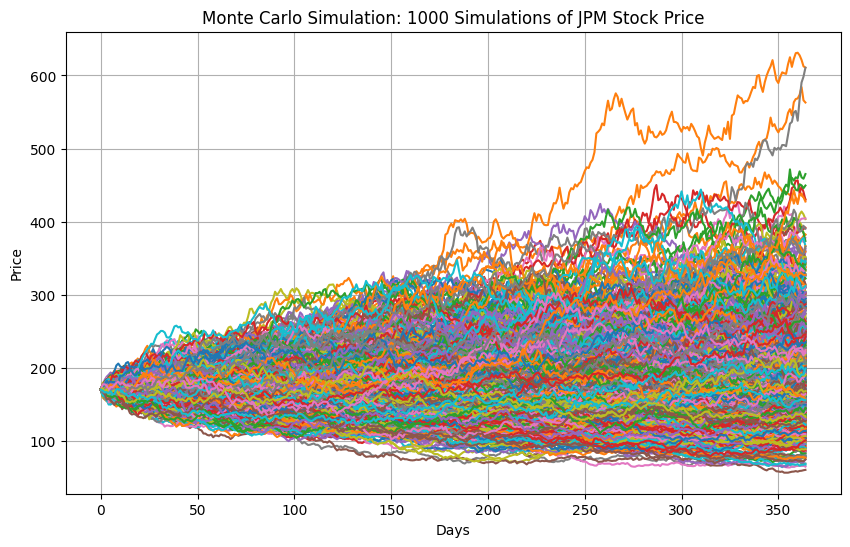

In [5]:
# Step 4: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(simulation_results)
plt.title(f'Monte Carlo Simulation: {num_simulations} Simulations of {ticker} Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The chart shows many possible paths for JP Morgan's stock price. Each line represents a different future scenario. The lines are spread out to show the stock price can go up or down a lot. This is because the stock market is unpredictable.










#### Step 5: Optional - Statistical Summary


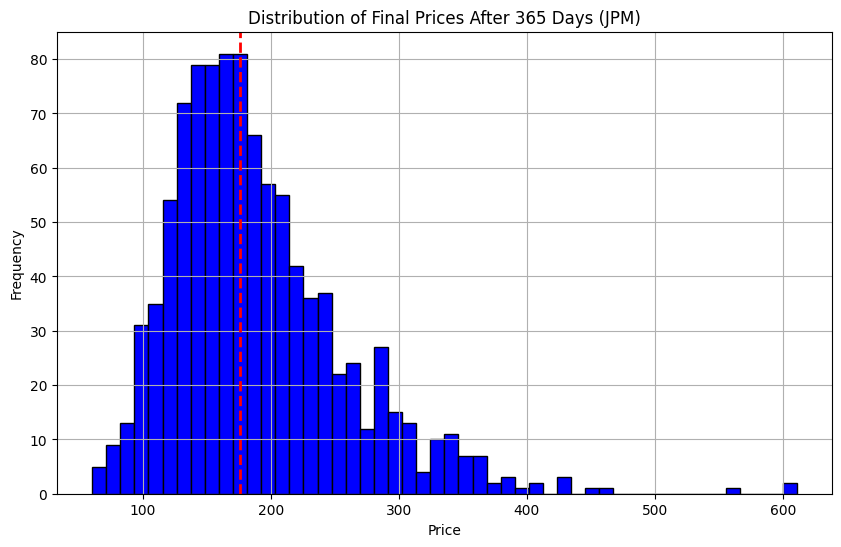

Mean Final Price: 189.62668708247685
Median Final Price: 175.82787583099324
5th Percentile Final Price: 101.22528563083583
95th Percentile Final Price: 325.1861128380309


In [6]:
# Step 5: Optional - Statistical Summary
# Mean, Median, and Percentile results at the end of the simulation
ending_prices = simulation_results[-1, :]  # Get prices on the last simulated day

# Plotting the distribution of final prices
plt.figure(figsize=(10, 6))
plt.hist(ending_prices, bins=50, color='blue', edgecolor='black')
plt.axvline(np.percentile(ending_prices, 50), color='red', linestyle='dashed', linewidth=2)
plt.title(f'Distribution of Final Prices After {num_days} Days ({ticker})')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print statistical measures
print(f"Mean Final Price: {np.mean(ending_prices)}")
print(f"Median Final Price: {np.median(ending_prices)}")
print(f"5th Percentile Final Price: {np.percentile(ending_prices, 5)}")
print(f"95th Percentile Final Price: {np.percentile(ending_prices, 95)}")

The chart shows how many times JP Morgan's stock price ended up at different prices after 365 days. Most prices were around 200, but there were also some prices that were much higher or lower. The red line shows the most common price.

The chart shows the distribution of final stock prices after 365 days. Here are some key statistics:

- Mean: The average final price was 189.63USD.
- Median: Half of the final prices were above 175.83USD and half were below.
- 5th Percentile: Only 5% of the final prices were below 101.23USD.
- 95th Percentile: Only 5% of the final prices were above 325.19USD.

This information can help investors understand the potential range of outcomes and the likelihood of different scenarios.